In [9]:
import sklearn.svm as svm
from os import listdir
import os
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import cv2
import numpy as np
from sklearn import model_selection, preprocessing, neighbors
import collections
import pickle

img_dimension = 200

['/Users/rohitneppalli/Downloads/Flags/AA-flag.png', '/Users/rohitneppalli/Downloads/Flags/AC-flag.png', '/Users/rohitneppalli/Downloads/Flags/AE-flag.png', '/Users/rohitneppalli/Downloads/Flags/AF-flag.png', '/Users/rohitneppalli/Downloads/Flags/AG-flag.png', '/Users/rohitneppalli/Downloads/Flags/AJ-flag.png', '/Users/rohitneppalli/Downloads/Flags/AL-flag.png', '/Users/rohitneppalli/Downloads/Flags/AM-flag.png', '/Users/rohitneppalli/Downloads/Flags/AN-flag.png', '/Users/rohitneppalli/Downloads/Flags/AO-flag.png', '/Users/rohitneppalli/Downloads/Flags/AQ-flag.png', '/Users/rohitneppalli/Downloads/Flags/AR-flag.png', '/Users/rohitneppalli/Downloads/Flags/AS-flag.png', '/Users/rohitneppalli/Downloads/Flags/AT-flag.png', '/Users/rohitneppalli/Downloads/Flags/AU-flag.png', '/Users/rohitneppalli/Downloads/Flags/AV-flag.png', '/Users/rohitneppalli/Downloads/Flags/AX-flag.png', '/Users/rohitneppalli/Downloads/Flags/BA-flag.png', '/Users/rohitneppalli/Downloads/Flags/BB-flag.png', '/Users/roh

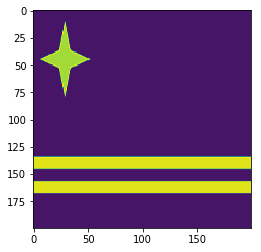

(200, 200)
40000


In [10]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])
print(onlyfiles)
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (img_dimension, img_dimension)))[
:, :, 0] for file in onlyfiles]  # screws up image color, but down to 2 dimensions
plt.imshow(images[0])
plt.show()
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

In [11]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = [div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})]
flags = [div.find("img")["src"][-11:-9] for div in html.find_all("div", attrs={"class": "flag-image"})]
map = {flags[i]: div_names[i] for i in range(len(flags))}
map = collections.OrderedDict(sorted(map.items()))
print(map)

OrderedDict([('AA', 'Aruba'), ('AC', 'Antigua and Barbuda'), ('AE', 'United Arab Emirates'), ('AF', 'Afghanistan'), ('AG', 'Algeria'), ('AJ', 'Azerbaijan'), ('AL', 'Albania'), ('AM', 'Armenia'), ('AN', 'Andorra'), ('AO', 'Angola'), ('AQ', 'American Samoa'), ('AR', 'Argentina'), ('AS', 'Australia'), ('AT', 'Ashmore and Cartier Islands'), ('AU', 'Austria'), ('AV', 'Anguilla'), ('AX', 'Akrotiri'), ('BA', 'Bahrain'), ('BB', 'Barbados'), ('BC', 'Botswana'), ('BD', 'Bermuda'), ('BE', 'Belgium'), ('BF', 'Bahamas, The'), ('BG', 'Bangladesh'), ('BH', 'Belize'), ('BK', 'Bosnia and Herzegovina'), ('BL', 'Bolivia'), ('BM', 'Burma'), ('BN', 'Benin'), ('BO', 'Belarus'), ('BP', 'Solomon Islands'), ('BQ', 'Navassa Island'), ('BR', 'Brazil'), ('BT', 'Bhutan'), ('BU', 'Bulgaria'), ('BV', 'Bouvet Island'), ('BX', 'Brunei'), ('BY', 'Burundi'), ('CA', 'Canada'), ('CB', 'Cambodia'), ('CD', 'Chad'), ('CE', 'Sri Lanka'), ('CF', 'Congo, Republic of the'), ('CG', 'Congo, Democratic Republic of the'), ('CH', 'Ch

In [15]:
df = pd.DataFrame({"Country": [val for key, val in map.items()]})

for i in range(img_dimension**2):
    pixels = [images[x][int(i/img_dimension)][i%img_dimension] for x in range(len(images))]
    pixels = preprocessing.scale(pixels)
    df["Pixel " + str(i + 1)] = pixels
print(df.head())

                Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
0                 Aruba -2.175375 -2.008326 -1.947517 -1.953955 -1.959769   
1   Antigua and Barbuda -0.476558 -3.402179 -3.412474 -3.434749 -3.442401   
2  United Arab Emirates -0.901263 -1.183793 -1.148450 -1.146250 -1.151061   
3           Afghanistan -3.732623 -3.519969 -3.412474 -3.434749 -3.442401   
4               Algeria  0.089714 -0.104048 -0.102052 -0.069309 -0.092039   

    Pixel 6   Pixel 7   Pixel 8   Pixel 9     ...       Pixel 39991  \
0 -2.001909 -2.012942 -2.010521 -2.003184     ...         -1.875702   
1 -3.508134 -3.521159 -3.515812 -3.506842     ...         -0.875427   
2 -1.180332 -1.190278 -1.189453 -1.183007     ...         -3.302021   
3 -3.508134 -3.521159 -3.515812 -3.506842     ...         -0.523478   
4 -0.104458 -0.112979 -0.114246 -0.108966     ...          0.513845   

   Pixel 39992  Pixel 39993  Pixel 39994  Pixel 39995  Pixel 39996  \
0    -1.875833    -1.876089    -1.876340

In [16]:
# If you're creating model for first time

# model = svm.SVC(gamma=0.001, C=1000)
# x = df[df.columns.values[1:]]
# y = df.Country
# model.fit(x, y)
# file = open("/Users/rohitneppalli/Downloads/svm_model", "wb")
# pickle.dump(model, file)
# file.close()

# Otherwise, load in model
file = open("/Users/rohitneppalli/Downloads/svm_model", "rb")
model = pickle.load(file)

In [17]:
img = "/Users/rohitneppalli/Downloads/ge.png"
img_array = np.array(cv2.resize(mpimg.imread(img, 0), (img_dimension, img_dimension)))[:, :, 0]
pixels = [img_array[int(i/img_dimension)][i % img_dimension] for i in range(img_dimension**2)]
pixels = np.array(preprocessing.scale(pixels))

print(model.predict(pixels.reshape(-1, img_dimension**2)))

['Germany']
